In [1]:

import numpy as np 
import pandas as pd 
import cv2



In [2]:
df = pd.read_csv('../input/facial-expression/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [5]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = df.iloc[0]['pixels'].split()

In [8]:
img = [int(i) for i in img]

In [9]:
type(img[0])

int

In [10]:
len(img)

2304

In [11]:
img = np.array(img)

In [12]:
img = img.reshape(48,48)

In [13]:
img.shape

(48, 48)

Text(0.5, 0, '0')

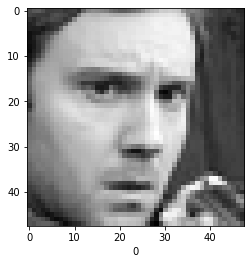

In [14]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [15]:
X = []
y = []

In [16]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

In [17]:
X, y = getData('../input/facial-expression/fer2013.csv')

In [18]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [19]:
X = np.array(X)/255.0
y = np.array(y)

In [20]:
X.shape, y.shape

((24006, 2304), (24006,))

In [21]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [22]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

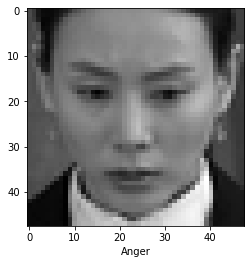

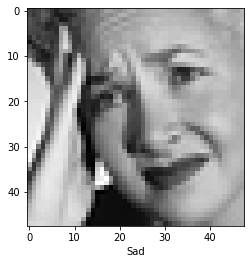

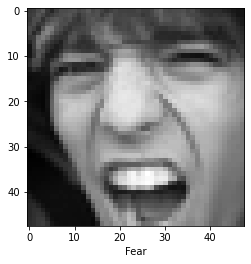

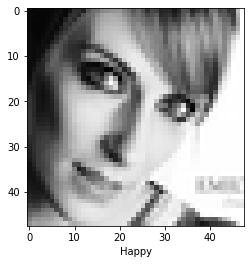

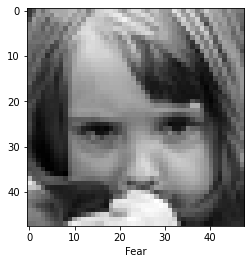

In [23]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [24]:
X = X.reshape(len(X), 48, 48, 1)

In [25]:
# no_of_images, height, width, coloar_map

In [26]:
X.shape

(24006, 48, 48, 1)

In [27]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [28]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [29]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [30]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [31]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [32]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
301/301 [==============================] - 900s 3s/step - loss: 2.1640 - accuracy: 0.2454 - val_loss: 2.9848 - val_accuracy: 0.1447
Epoch 2/22
301/301 [==============================] - 904s 3s/step - loss: 1.6806 - accuracy: 0.3351 - val_loss: 2.2665 - val_accuracy: 0.3063
Epoch 3/22
301/301 [==============================] - 906s 3s/step - loss: 1.5254 - accuracy: 0.4046 - val_loss: 1.5956 - val_accuracy: 0.3980
Epoch 4/22
301/301 [==============================] - 903s 3s/step - loss: 1.4310 - accuracy: 0.4480 - val_loss: 2.0206 - val_accuracy: 0.3215
Epoch 5/22
301/301 [==============================] - 905s 3s/step - loss: 1.3338 - accuracy: 0.4852 - val_loss: 1.3368 - val_accuracy: 0.4569
Epoch 6/22
301/301 [==============================] - 905s 3s/step - loss: 1.2623 - accuracy: 0.5072 - val_loss: 1.9226 - val_accuracy: 0.3340
Epoch 7/22
301/301 [==============================] - 907s 3s/step - loss: 1.1912 - accuracy: 0.5433 - val_loss: 1.8726 - val_accuracy: 0.3617

In [33]:
model.save('model.h5')

In [34]:
import cv2

In [35]:
test_img = cv2.imread('../input/happy-img-test/pexels-andrea-piacquadio-941693.jpg', 0)

In [36]:
test_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

In [ ]:
test_img = test_img.reshape(1,48,48,1)

In [ ]:
model.predict(test_img)

In [ ]:
# label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']